Importando as Bibliotecas e os Dados

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("euro2024_players.csv")
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


Verificando informações e tipos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


Análise estátstica descritiva do dataset

In [4]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


Obtendo a quantidade de jogadores por País

In [6]:
df["Country"].value_counts()

Country
Poland            27
Germany           26
Hungary           26
Scotland          26
Spain             26
Croatia           26
Albania           26
Switzerland       26
Italy             26
Slovenia          26
Denmark           26
England           26
Serbia            26
Netherlands       26
Austria           26
Slovakia          26
Portugal          26
Romania           26
Ukraine           26
Turkiye           26
Czech Republic    26
Georgia           26
France            25
Belgium           25
Name: count, dtype: int64

Filtrando os jogadores Portugueses

In [21]:
portugueses = df[df["Country"]=="Portugal"]
print(portugueses)


                    Name            Position  Age                     Club  \
571          Diogo Costa          Goalkeeper   24                 FC Porto   
572              José Sá          Goalkeeper   31  Wolverhampton Wanderers   
573         Rui Patrício          Goalkeeper   36                  AS Roma   
574           Rúben Dias         Centre-Back   27          Manchester City   
575       Gonçalo Inácio         Centre-Back   22              Sporting CP   
576        António Silva         Centre-Back   20               SL Benfica   
577                 Pepe         Centre-Back   41                 FC Porto   
578          Nuno Mendes           Left-Back   21      Paris Saint-Germain   
579          Diogo Dalot          Right-Back   25        Manchester United   
580         João Cancelo          Right-Back   30             FC Barcelona   
581        Nélson Semedo          Right-Back   30  Wolverhampton Wanderers   
582        João Palhinha  Defensive Midfield   28               

Análisando as Caracteristicas do CR7

In [24]:
Cr7Analise = df[df["Name"] == "Cristiano Ronaldo"]
print("Caracteristicas do Cristiano Ronaldo")
print(Cr7Analise)

Caracteristicas do Cristiano Ronaldo
                  Name        Position  Age         Club  Height   Foot  Caps  \
596  Cristiano Ronaldo  Centre-Forward   39  Al-Nassr FC     188  right   206   

     Goals  MarketValue   Country  
596    128     15000000  Portugal  


Obtendo o jogador com mais gols da EuroCopa

In [31]:
Jogador_com_mais_gols = df.loc[df['Goals'].idxmax()]
print(Jogador_com_mais_gols)

Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


Obtendo a média de idade por País

In [33]:
media_idade = df.groupby('Country')['Age'].mean()
print(media_idade)

Country
Albania           27.307692
Austria           26.807692
Belgium           26.880000
Croatia           27.692308
Czech Republic    25.307692
Denmark           27.692308
England           26.076923
France            26.880000
Georgia           27.153846
Germany           28.115385
Hungary           27.423077
Italy             26.500000
Netherlands       26.538462
Poland            27.555556
Portugal          26.961538
Romania           27.000000
Scotland          28.230769
Serbia            27.384615
Slovakia          27.269231
Slovenia          27.346154
Spain             26.961538
Switzerland       27.692308
Turkiye           25.807692
Ukraine           26.346154
Name: Age, dtype: float64


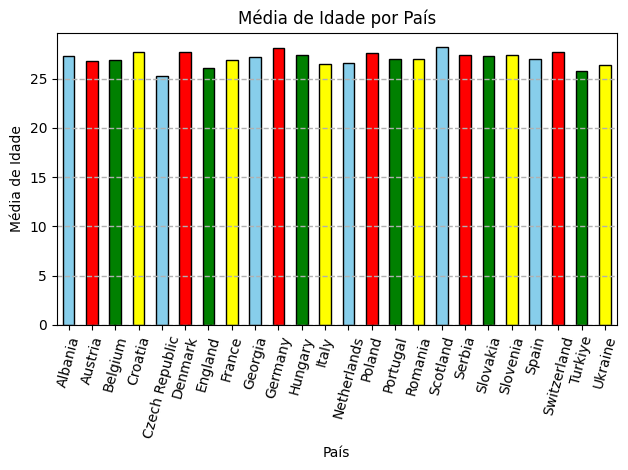

In [53]:
cores = ['skyblue', 'red', 'green', 'yellow']
media_idade.plot(kind='bar', color=cores ,edgecolor='black')
plt.title('Média de Idade por País')
plt.xlabel('País')
plt.ylabel('Média de Idade')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', linewidth=1.0)

plt.tight_layout()
plt.show()

Número de jogadores por posição

Text(0.5, 1.0, 'Número de Jogadores por posição')

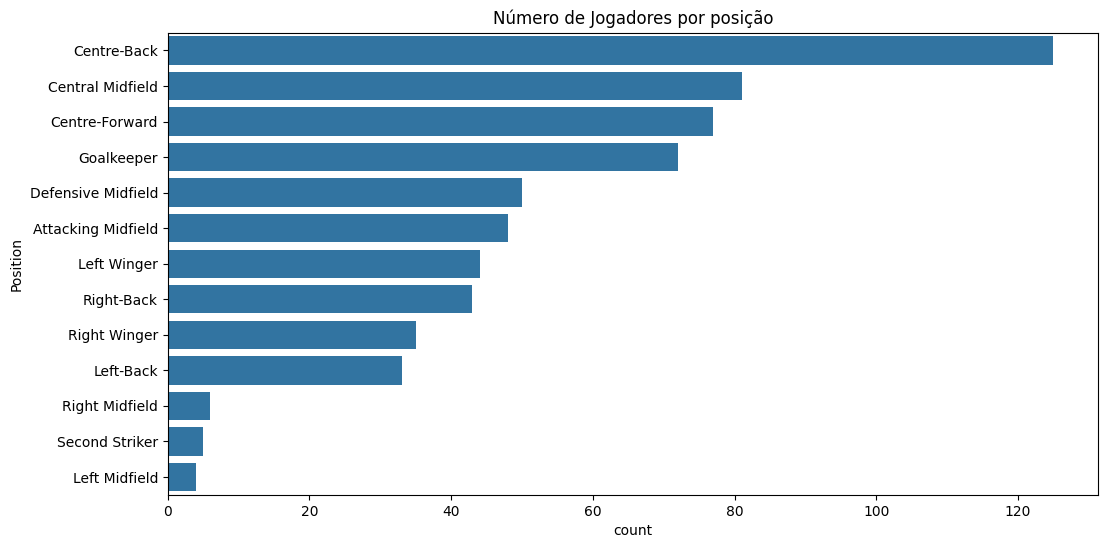

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Position', data=df, order=df['Position'].value_counts().index)
plt.title('Número de Jogadores por posição')